#Exploración

In [150]:
## Import all libraries
#from statsmodels.graphics.tsaplots import plot_acf
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

In [151]:
#Windows
#df = pd.read_excel(r"C:\Users\20344807257\Desktop\base_2012_2022_limpia.xlsx")
#MacOs
df = pd.read_excel("/Users/santi/Desktop/Work/Bases/base_2012_2022_limpia.xlsx")
#df.drop(df.columns[[0,1,2]],axis=1,inplace=True)
df["TIPO_OBRA"] = df["TIPO_OBRA"].astype(str)
serie_total = pd.DataFrame()
serie_barrios = pd.DataFrame()
for i in ["1","2","3"]:
    a = (df[df["TIPO_OBRA"] == i].groupby(['ANIO', 'TRIMESTRE']).size())
    serie_total.index = a.index
    serie_total[f"TIPO_OBRA_{i}"] = a.array
serie_total["TOTAL"] = serie_total["TIPO_OBRA_1"] + serie_total["TIPO_OBRA_2"] + serie_total["TIPO_OBRA_3"]
df.dropna(subset="TRIMESTRE", inplace=True)
df["DATE"] = df["ANIO"].astype(str) + "-" + df["TRIMESTRE"].astype(str)
df.dropna(subset="SUP_CONST",inplace=True)
df["BARRIOS"] = df["BARRIOS"].str.replace(",", ".")
df["BARRIOS"] = df["BARRIOS"].str.replace("NUNEZ", "NUÑEZ")
df = df[df["ANIO"]  != 2020]
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,ANIO,MES,TRIMESTRE,FECHA,DIRECCION,TIPO_OBRA,TIPO_OBRA_CUR,...,BARRIOS,COMUNA,PROPIETARIO,Latitud,Longitud,OBS,add,location,address,DATE
0,0,0.0,7,2022,1,1.0,3 ene 2022,GUARDIA VIEJA 3764,1,OBRA MAYOR,...,ALMAGRO,5.0,PRIVADO PARTICULAR,-34.601221,-58.417228,NaN,"GUARDIA VIEJA 3764 ALMAGRO Buenos Aires, Argen...",0.0,"GUARDIA VIEJA 3764 ALMAGRO Buenos Aires, Argen...",2022-1.0
1,1,1.0,8,2022,2,1.0,25 feb 2022,YATAY 641,1,OBRA MAYOR,...,ALMAGRO,5.0,PERSONERIA JURIDICA,NaN,NaN,NaN,"YATAY 641 ALMAGRO Buenos Aires, Argentina",NaN,"YATAY 641 ALMAGRO Buenos Aires, Argentina",2022-1.0
2,2,2.0,9,2022,3,1.0,3 mar 2022,RAWSON 276,1,Obra Mayor,...,ALMAGRO,5.0,PRIVADO PARTICULAR,-34.609157,-58.426283,NaN,"RAWSON 276 ALMAGRO Buenos Aires, Argentina",2.0,"RAWSON 276 ALMAGRO Buenos Aires, Argentina",2022-1.0
3,3,3.0,10,2022,1,1.0,25 ene 2022,TREINTA Y TRES ORIENTALES 682,1,OBRA MEDIA,...,ALMAGRO,5.0,PRIVADO PARTICULAR,NaN,NaN,NaN,TREINTA Y TRES ORIENTALES 682 ALMAGRO Buenos A...,NaN,TREINTA Y TRES ORIENTALES 682 ALMAGRO Buenos A...,2022-1.0
4,4,4.0,11,2022,3,1.0,2 mar 2022,LAMBARE 847,1,OBRA MAYOR,...,ALMAGRO,5.0,PERSONERIA JURIDICA,-34.605103,-58.430465,NaN,"LAMBARE 847 ALMAGRO Buenos Aires, Argentina",4.0,"LAMBARE 847 ALMAGRO Buenos Aires, Argentina",2022-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25521,21598,NaN,17841,2021,5,2.0,20/5/2021,ZUVIRIA 716,2,Obra Mayor,...,PARQUE CHACABUCO,7.0,PRIVADO,-34.630263,-58.435021,NaN,NaN,NaN,NaN,2021-2.0
25522,21599,NaN,17842,2012,8,3.0,2012-08-24 00:00:00,ZUVIRIA 717,1,SIN DATOS,...,PARQUE CHACABUCO,7.0,NaN,-34.629947,-58.435159,NaN,NaN,NaN,NaN,2012-3.0
25523,21600,NaN,17843,2021,5,2.0,18/5/2021,ZUVIRIA 720,2,Obra Mayor,...,PARQUE CHACABUCO,7.0,PRIVADO,-34.630311,-58.435095,NaN,NaN,NaN,NaN,2021-2.0
25524,21601,NaN,17844,2021,4,2.0,3/11/2021,ZUVIRIA 770,1,Obra Mayor,...,PARQUE CHACABUCO,7.0,PRIVADO-PARTICULAR,-34.630351,-58.435445,NaN,NaN,NaN,NaN,2021-2.0


In [152]:
##Agrupamiento de los datos por año y trimestre

<Axes: >

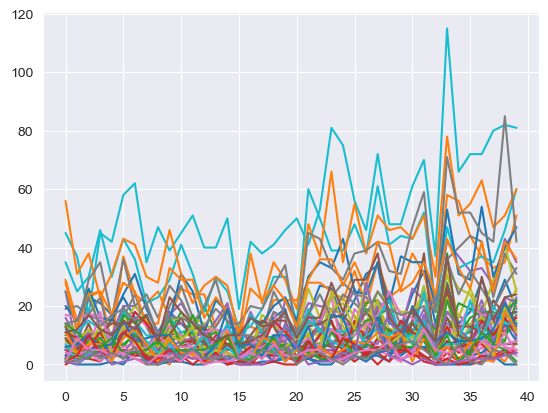

In [153]:
#Grouping of data by date
merge = pd.DataFrame()
for i in df["BARRIOS"].unique():
    b = (df[df["BARRIOS"] == i].groupby(['DATE']).size()).to_frame(name=i)
    
    merge= pd.merge(merge, b, how="outer", right_index = True, left_index = True)
    merge.fillna(0,inplace=True)
merge.reset_index(inplace=True)
merge.plot(legend=None)

In [154]:
##Promedio móvil para disminuir varianzas estacionales y extraer tendencia

/var/folders/d3/r414kbwd72g3nnhvylz22y9m0000gp/T/ipykernel_1469/2742227456.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['DATE'], dtype='object')
  merge_mean = merge.rolling(4).mean()


<Axes: >

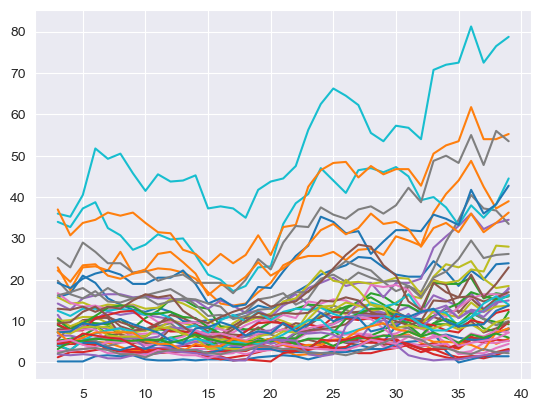

In [155]:
#Moving average of time series
merge_mean = merge.rolling(4).mean()
merge_mean.plot(legend=None)

In [156]:
#Normalización de cada barrio para que las tendencias sean comparables

     ALMAGRO  CONSTITUCION  SAN CRISTOBAL  SAN TELMO  BALVANERA  MONSERRAT  \
0        NaN           NaN            NaN        NaN        NaN        NaN   
1        NaN           NaN            NaN        NaN        NaN        NaN   
2        NaN           NaN            NaN        NaN        NaN        NaN   
3  -0.377562      0.939621      -0.936356   0.763521  -0.103995  -0.987774   
4  -0.175832      0.579352      -0.686210   1.277162  -1.661441  -1.968918   
5   0.681520      0.399217      -0.310992   1.277162  -1.111754   0.238657   
6   0.328493      0.759486       0.564518   1.020341  -0.470453   0.729229   
7  -0.427995      0.579352       0.814664   0.506700   0.170849   1.465087   
8  -0.730590     -0.141187      -0.185919  -0.520582  -0.103995   1.955659   
9  -0.982752     -0.861725      -0.561138  -0.777403   0.079234  -0.251915   
10 -1.083617     -0.681590      -1.061429  -0.777403  -0.103995  -0.497201   
11 -0.881887     -0.681590      -0.811283  -0.777403  -0.287224 

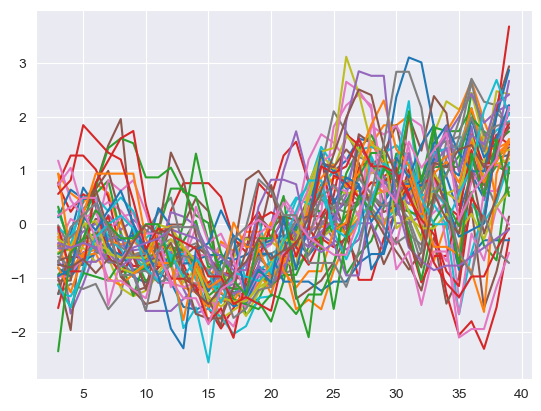

In [157]:
#Normalizing all time series by scoring
zscore_merge = zscore(merge_mean, nan_policy="omit")
zscore_merge.plot(legend=None)
print(zscore_merge)

In [158]:
##Regresiones para extraer la tendencia lineal de cada barrio.

,VILLA URQUIZA,COLEGIALES,FLORES,PALERMO,SAAVEDRA,VILLA DEVOTO
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.231439,-0.521596,-0.798012,-1.284483,-0.818194,-0.604630
4,-0.834485,-0.470540,-1.266011,-1.340638,-0.972021,-0.800298
5,-0.545023,-0.317373,-0.585286,-0.947553,-0.695132,-0.278518
6,-0.472657,-0.317373,-0.542740,-0.105227,-0.541305,-0.474185
7,-0.303805,-0.623708,-1.010739,-0.292411,-0.449009,-0.713335
8,-0.376170,-1.185320,-1.138375,-0.198819,-0.572071,-0.713335
9,-0.303805,-1.338488,-0.925648,-0.554468,-0.848959,-0.909002


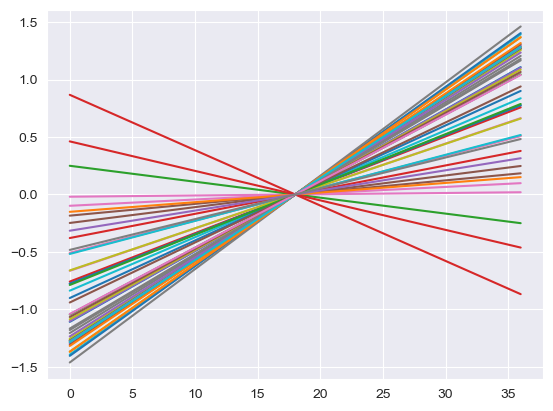

In [159]:
#Linear regression of each time series
regressor = LinearRegression()
regressions = pd.DataFrame()
coefficients= pd.DataFrame()
for i in zscore_merge.columns:
    y = zscore_merge[i].dropna()
    x = np.array(y.index).reshape(-1,1)
    regressor.fit(x, y)
    #plt.scatter(x,y)
    #plt.plot(x, regressor.predict(x))
    coefficients[i] = regressor.coef_
    regressions[i] = regressor.predict(x)

regressions.plot(legend=None)
coefficients = coefficients.T.sort_values(by=0)
head = zscore_merge[coefficients.head(6).index.array]
tail = zscore_merge[coefficients.tail(6).index.array]

coefficients
tail

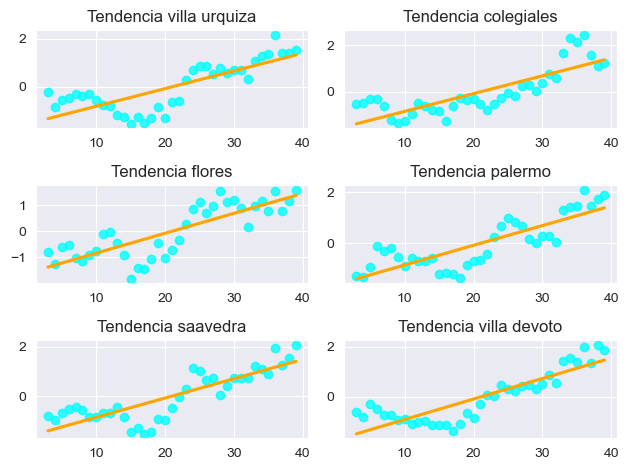

In [160]:
fig, axes = plt.subplots(nrows=3, ncols=2)
# iterate over the subplots and plot the data
for i, ax in enumerate(axes.flatten()):
    #ax.plot(head.iloc[:,0])
    sns.regplot(x=tail.iloc[:,i].index, y = tail.iloc[:,i].array,data=tail.iloc[:,0],
                ax=ax, line_kws={'color': 'orange'}, scatter_kws={'color': 'cyan'}, ci=None)
    #print(head.iloc[i])
    ax.set_title(f"Tendencia {tail.columns[i].lower()}")

# adjust the layout and display the plot
plt.tight_layout()
plt.show()

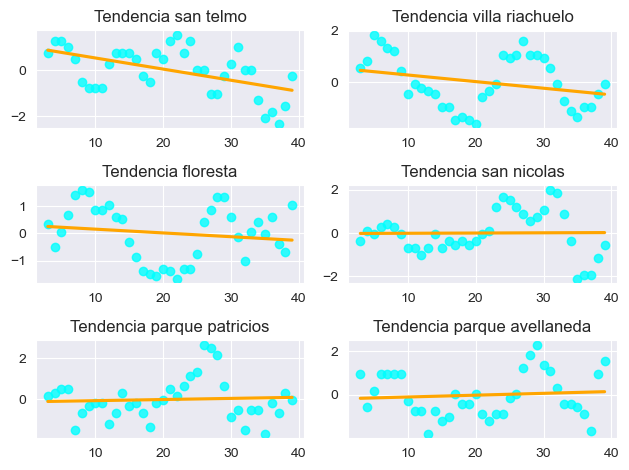

In [161]:
fig, axes = plt.subplots(nrows=3, ncols=2)
# iterate over the subplots and plot the data
for i, ax in enumerate(axes.flatten()):
    #ax.plot(head.iloc[:,0])
    sns.regplot(x=head.iloc[:,i].index, y = head.iloc[:,i].array,data=head.iloc[:,0],
                ax=ax, line_kws={'color': 'orange'}, scatter_kws={'color': 'cyan'}, ci=None)
    #print(head.iloc[i])
    ax.set_title(f"Tendencia {head.columns[i].lower()}")

# adjust the layout and display the plot
plt.tight_layout()
plt.show()

#patial data points

In [162]:
#Libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.ops import unary_union
import folium
from shapely.geometry import MultiPolygon, Polygon
import fiona
from shapely.geometry import Point

#Managing the data

In [163]:
#df = pd.read_excel(r"C:\Users\20344807257\Desktop\base_2012_2022_limpia.xlsx")
df = pd.read_excel("/Users/santi/Desktop/Work/Bases/base_2012_2022_limpia.xlsx")
#Select 2022
df = df[df["ANIO"]  == 2022]
#Geojson barrios caba
GeoJson_barrios = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-educacion/barrios/barrios.geojson"
geojson = gpd.read_file(GeoJson_barrios)
#Point geometries from lat, long columns
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy( df["Longitud"], df["Latitud"]))
#Boundary of CABA
boundary = unary_union(geojson["geometry"]).exterior

/Users/santi/miniconda3/lib/python3.10/site-packages/shapely/set_operations.py:426: RuntimeWarning: invalid value encountered in unary_union
  return lib.unary_union(collections, **kwargs)


#Removing false data

In [175]:
#Removing al points outside of the boundary

# perform spatial join
joined = gpd.sjoin(gdf, geojson, op='within')

# filter out points that do not intersect with the boundary
points_within_boundary = joined[joined.index_right.notnull()]
clean_df = points_within_boundary

/Users/santi/miniconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/var/folders/d3/r414kbwd72g3nnhvylz22y9m0000gp/T/ipykernel_1469/1641833338.py:4: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  joined = gpd.sjoin(gdf, geojson, op='within')


#Plotting the result over map of CABA

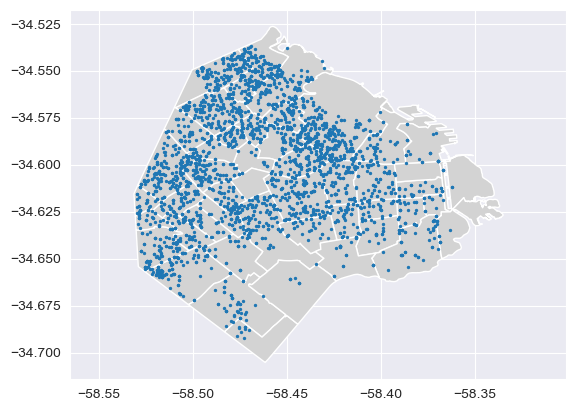

In [165]:

# Plot the geometry
#gdf.plot(marker='o', color='red', markersize=5)

#plt.show()


fig, ax = plt.subplots()
geojson["geometry"].plot(ax=ax, color='lightgrey')

points_within_boundary.plot(ax=ax, markersize=2)
ax.set_aspect('equal', adjustable="datalim")
ax.autoscale(False)

plt.show()

#Folium

In [166]:
points_within_boundary = points_within_boundary.geometry.set_crs(epsg=4326)


m = folium.Map(location=[points_within_boundary.geometry.y.mean(), points_within_boundary.geometry.x.mean()], zoom_start=12)

# Add the GeoJSON representation of the points to the map
folium.GeoJson(points_within_boundary.geometry).add_to(m)

# Display the map


#Clustering

In [167]:
#libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from geopy.distance import great_circle
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint

In [176]:
clean_df = clean_df[["Latitud","Longitud", "geometry"]]
clean_df

,Latitud,Longitud,geometry
0,-34.601221,-58.417228,POINT (-58.41723 -34.60122)
2,-34.609157,-58.426283,POINT (-58.42628 -34.60916)
4,-34.605103,-58.430465,POINT (-58.43047 -34.60510)
5,-34.602169,-58.417625,POINT (-58.41762 -34.60217)
6,-34.604811,-58.422539,POINT (-58.42254 -34.60481)
...,...,...,...
2635,-34.638144,-58.369439,POINT (-58.36944 -34.63814)
2636,-34.638144,-58.369439,POINT (-58.36944 -34.63814)
2637,-34.629936,-58.370455,POINT (-58.37045 -34.62994)
2638,-34.629936,-58.370455,POINT (-58.37045 -34.62994)


In [179]:
latitudes = df['Latitud'].values.reshape(-1, 1)
longitudes = df['Longitud'].values.reshape(-1, 1)
print(latitudes)
print(longitudes)
"""
# Convert latitude and longitude to kilometers
data_in_km = [great_circle((lat, lon), (data[0][0], data[0][1])).km for lat, lon in data]
data_in_km = np.array(data_in_km).reshape(-1, 1)

# Scale the data to zero mean and unit variance
scaler = StandardScaler().fit(data_in_km)
data_scaled = scaler.transform(data_in_km)

# Compute DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
clusters = dbscan.fit_predict(data_scaled)

# Print the clusters
print(clusters)"""

[[-34.60122072]
 [         nan]
 [-34.6091572 ]
 ...
 [-34.62850477]
 [-34.62850477]
 [-34.62850477]]
[[-58.41722785]
 [         nan]
 [-58.42628255]
 ...
 [-58.5289238 ]
 [-58.5289238 ]
 [-58.5289238 ]]


"\n# Convert latitude and longitude to kilometers\ndata_in_km = [great_circle((lat, lon), (data[0][0], data[0][1])).km for lat, lon in data]\ndata_in_km = np.array(data_in_km).reshape(-1, 1)\n\n# Scale the data to zero mean and unit variance\nscaler = StandardScaler().fit(data_in_km)\ndata_scaled = scaler.transform(data_in_km)\n\n# Compute DBSCAN\ndbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')\nclusters = dbscan.fit_predict(data_scaled)\n\n# Print the clusters\nprint(clusters)"